<a href="https://colab.research.google.com/github/sabajannat78/Tired/blob/main/vehicles_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
vehicles=pd.read_csv('/content/drive/MyDrive/Filtered_Columns/vehicle.csv')

In [ ]:
vehicles.head(1)

,Unnamed: 0,Accident_ID,senc,catagory_veh,occupants_num,obstacles_fixed,obstacle_mobile,shock,maneuver,num_veh
0,0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02


In [ ]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433389 entries, 0 to 1433388
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1433389 non-null  int64  
 1   Accident_ID      1433389 non-null  int64  
 2   senc             1433317 non-null  float64
 3   catagory_veh     1433389 non-null  int64  
 4   occupants_num    1433389 non-null  int64  
 5   obstacles_fixed  1432627 non-null  float64
 6   obstacle_mobile  1432788 non-null  float64
 7   shock            1433160 non-null  float64
 8   maneuver         1433083 non-null  float64
 9   num_veh          1433389 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 109.4+ MB


In [ ]:
vehicles.shape

(1433389, 10)

In [ ]:

vehicles.isnull().sum()

Unnamed: 0           0
Accident_ID          0
senc                72
catagory_veh         0
occupants_num        0
obstacles_fixed    762
obstacle_mobile    601
shock              229
maneuver           306
num_veh              0
dtype: int64

In [ ]:
vehicles.notnull().sum()

Unnamed: 0         1433389
Accident_ID        1433389
senc               1433317
catagory_veh       1433389
occupants_num      1433389
obstacles_fixed    1432627
obstacle_mobile    1432788
shock              1433160
maneuver           1433083
num_veh            1433389
dtype: int64

In [ ]:
vehicles.dropna(inplace=True)

In [ ]:
vehicles.shape

(1432040, 10)

In [ ]:

vehicles.isnull().sum()

Unnamed: 0         0
Accident_ID        0
senc               0
catagory_veh       0
occupants_num      0
obstacles_fixed    0
obstacle_mobile    0
shock              0
maneuver           0
num_veh            0
dtype: int64

In [ ]:
vehicles.notnull().sum()

Unnamed: 0         1432040
Accident_ID        1432040
senc               1432040
catagory_veh       1432040
occupants_num      1432040
obstacles_fixed    1432040
obstacle_mobile    1432040
shock              1432040
maneuver           1432040
num_veh            1432040
dtype: int64

In [ ]:
vehicles.groupby(["catagory_veh", "occupants_num"])["Accident_ID"].count()


catagory_veh  occupants_num
1             0                58040
2             0                79840
3             0                 5007
4             0                 7462
              100                  1
                               ...  
40            184                  1
              200                  1
              210                  1
99            0                 5426
              1                    2
Name: Accident_ID, Length: 366, dtype: int64

In [ ]:
mask = vehicles.catagory_veh!=7
vehicles[mask]

,Unnamed: 0,Accident_ID,senc,catagory_veh,occupants_num,obstacles_fixed,obstacle_mobile,shock,maneuver,num_veh
1,1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
4,4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
6,6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02
9,9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01
14,14,201600000009,0.0,30,0,0.0,0.0,2.0,1.0,B02
...,...,...,...,...,...,...,...,...,...,...
1433373,1433373,200500087945,0.0,13,0,0.0,2.0,3.0,1.0,B01
1433376,1433376,200500087947,0.0,5,0,0.0,2.0,1.0,1.0,B01
1433378,1433378,200500087949,0.0,2,0,11.0,0.0,1.0,1.0,A01
1433381,1433381,200500087951,0.0,5,0,0.0,2.0,1.0,17.0,A01


In [ ]:
veh = vehicles[vehicles.catagory_veh!=7].pivot_table(index=["catagory_veh"],
                           columns= ["occupants_num"],
                           values=["Accident_ID"],
                           aggfunc="count",
                           fill_value=0)

<Axes: xlabel='None-occupants_num', ylabel='catagory_veh'>

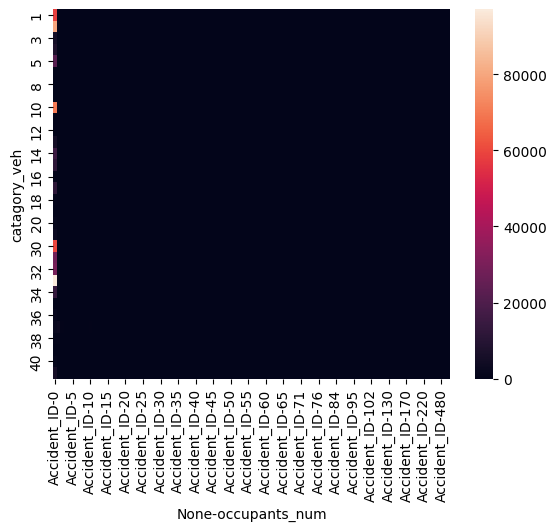

In [ ]:
sns.heatmap(veh)

In [ ]:
vehicles.groupby(["catagory_veh"])["Accident_ID"].count()


catagory_veh
1      58040
2      79840
3       5007
4       7463
5      21816
6         39
7     889322
8        120
9        300
10     70126
11        17
12        79
13      5288
14     15367
15     11758
16       657
17     11488
18      2075
19       183
20      1383
21      2760
30     59892
31     28024
32     29584
33     97101
34     13432
35       367
36      1622
37      9065
38      2517
39       326
40      1554
99      5428
Name: Accident_ID, dtype: int64

In [ ]:
catagory_pub_transports = [37, 38, 39, 40]


In [ ]:
vehicles["catagory_pub_transports"] = vehicles.catagory_veh.isin(catagory_pub_transports)


In [ ]:
vehicles.head()

,Unnamed: 0,Accident_ID,senc,catagory_veh,occupants_num,obstacles_fixed,obstacle_mobile,shock,maneuver,num_veh,catagory_pub_transports
0,0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02,False
1,1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01,False
2,2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01,False
3,3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01,False
4,4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02,False


In [ ]:
df_pub_transport = vehicles[vehicles.catagory_pub_transports]


In [ ]:
df_pub_transport.shape

(13462, 11)

In [ ]:
veh

Accident_ID                                            ...      \
occupants_num         0     1    2    3    4    5   6   7   8   9    ... 200   
catagory_veh                                                         ...       
1                   58040     0    0    0    0    0   0   0   0   0  ...   0   
2                   79840     0    0    0    0    0   0   0   0   0  ...   0   
3                    5007     0    0    0    0    0   0   0   0   0  ...   0   
4                    7462     0    0    0    0    0   0   0   0   0  ...   0   
5                   21816     0    0    0    0    0   0   0   0   0  ...   0   
6                      39     0    0    0    0    0   0   0   0   0  ...   0   
8                     120     0    0    0    0    0   0   0   0   0  ...   0   
9                     300     0    0    0    0    0   0   0   0   0  ...   0   
10                  70121     2    2    0    1    0   0   0   0   0  ...   0   
11                     17     0    0    0    0    0   0   0   0   0  ...   0   
12                     79     0    0    0    0    0   0   0   0   0  ...   0   
13                   5288     0    0    0    0    0   0   0   0   0  ...   0   
14                  15363     4    0    0    0    0   0   0   0   0  ...   0   
15                  11758     0    0    0    0    0   0   0   0   0  ...   0   
16                    657     0    0    0    0    0   0   0   0   0  ...   0   
17                  11485     3    0    0    0    0   0   0   0   0  ...   0   
18                    963   432   72   35   25   24  15   9  20  12  ...   0   
19                    183     0    0    0    0    0   0   0   0   0  ...   0   
20                   1383     0    0    0    0    0   0   0   0   0  ...   0   
21                   2760     0    0    0    0    0   0   0   0   0  ...   0   
30                  59891     0    0    0    0    0   0   0   0   0  ...   0   
31                  28024     0    0    0    0    0   0   0   0   0  ...   0   
32                  29583     1    0    0    0    0   0   0   0   0  ...   0   
33                  97099     0    0    0    0    0   0   0   0   0  ...   0   
34                  13429     2    1    0    0    0   0   0   0   0  ...   0   
35                    359     3    5    0    0    0   0   0   0   0  ...   0   
36                   1622     0    0    0    0    0   0   0   0   0  ...   0   
37                   2530  3307  487  277  143  157  88  50  47  38  ...   0   
38                    965   822   94   40   20   27  22   6  16  18  ...   0   
39                    236    34    8    3    1    0   1   0   1   1  ...   0   
40                   1215   121   17    3    1    1   0   0   0   0  ...   1   
99                   5426     2    0    0    0    0   0   0   0   0  ...   0   

                                                   
occupants_num 210 220 240 250 300 470 480 490 700  
catagory_veh                                       
1               0   0   0   0   0   0   0   0   0  
2               0   0   0   0   0   0   0   0   0  
3               0   0   0   0   0   0   0   0   0  
4               0   0   0   0   0   0   0   0   0  
5               0   0   0   0   0   0   0   0   0  
6               0   0   0   0   0   0   0   0   0  
8               0   0   0   0   0   0   0   0   0  
9               0   0   0   0   0   0   0   0   0  
10              0   0   0   0   0   0   0   0   0  
11              0   0   0   0   0   0   0   0   0  
12              0   0   0   0   0   0   0   0   0  
13              0   0   0   0   0   0   0   0   0  
14              0   0   0   0   0   0   0   0   0  
15              0   0   0   0   0   0   0   0   0  
16              0   0   0   0   0   0   0   0   0  
17              0   0   0   0   0   0   0   0   0  
18              0   0   0   0   0   1   0   0   0  
19              0   0   0   0   0   0   0   0   0  
20              0   0   0   0   0   0   0   0   0  
21              0   0   0   0   0   0   0   0   0  
30              0

In [ ]:
veh2 = df_pub_transport.pivot_table(index=["catagory_veh"],
                           values=["occupants_num"],
                           aggfunc="mean",
                           fill_value=0)

In [ ]:
veh2.sort_values("occupants_num")


,occupants_num
catagory_veh,
40,5.857786
37,6.620629
38,7.410807
39,8.420245


<Axes: ylabel='catagory_veh'>

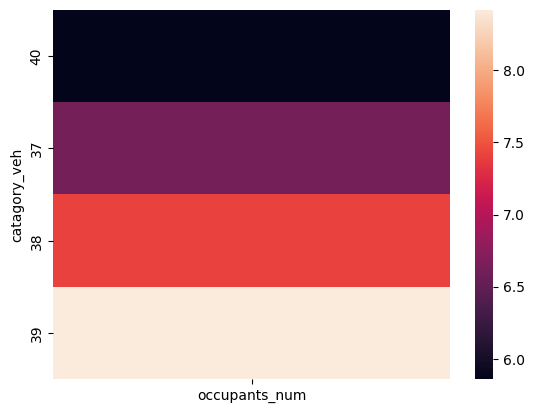

In [ ]:
sns.heatmap(veh2.sort_values('occupants_num'))

In [ ]:
info_vehicles = {
1: "Bicycle",
2: "Moped <50cm3",
3: "Car (Quadricycle with bodied motor) (formerly cart or motor tricycle)",
4: "Reference no longer used since 2006 (registered scooter)",
5: "Reference no longer used since 2006 (motorcycle)",
6: "Reference no longer used since 2006 (sidecar)",
7: "LV only",
8: "Category no longer used (LV + caravan)",
9: "Category no longer used (VL + trailer)",
10: "LCV only 1.5T <= GVW <= 3.5T with or without trailer (formerly LCV only 1.5T <= GVW <= 3.5T)",
11: "Reference no longer used since 2006 (VU (10) + caravan)",
12: "Reference no longer used since 2006 (VU (10) + trailer)",
13: "PL only 3.5T <PTCA <= 7.5T",
14: "PL only > 7.5T",
15: "PL > 3.5T + trailer",
16: "Road tractor alone",
17: "Road tractor + semi-trailer",
18: "Reference no longer used since 2006 (public transport)",
19: "Reference no longer used since 2006 (tramway)",
20: "Special machine",
21: "Farm Tractor",
30: "Scooter < 50 cc",
31: "Motorcycle > 50 cm and <= 125 cm",
32: "Scooter >50cm and <=125cm",
33: "Motorcycle",
34: "Scooer",
35: "Quad",
36: "Heavy Quad > 50 cm (Unbodied motor quadricycle)",
37: "Bus",
38: "Coach",
39: "Train",
40: "Tram",
99: "Other vehicle"}

In [ ]:
vehicles["label_vehicle"]=vehicles.catagory_veh.map(info_vehicles)
vehicles.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Accident_ID,201600000001,201600000001,201600000002,201600000003,201600000004
senc,0.0,0.0,0.0,0.0,0.0
catagory_veh,7,2,7,7,32
occupants_num,0,0,0,0,0
obstacles_fixed,0.0,0.0,6.0,0.0,0.0
obstacle_mobile,0.0,0.0,0.0,1.0,0.0
shock,1.0,7.0,1.0,6.0,1.0
maneuver,1.0,15.0,1.0,1.0,1.0
num_veh,B02,A01,A01,A01,B02


In [ ]:
vehicles.columns

Index(['Unnamed: 0', 'Accident_ID', 'senc', 'catagory_veh', 'occupants_num',
       'obstacles_fixed', 'obstacle_mobile', 'shock', 'maneuver', 'num_veh',
       'catagory_pub_transports', 'label_vehicle'],
      dtype='object')

In [ ]:
#obstacle_mobile
labels = {
0: "unknown_0",
1: "Pedestrian",
2: "Vehicle",
4: "Rail_vehicle",
5: "Pet",
6: "Wild_Animal",
9: "Other",
None: "unknown"}

In [ ]:
sorted(vehicles.obstacle_mobile.unique())


[0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 9.0]

In [ ]:
vehicles["label_obstacle_mobile"] = vehicles.obstacle_mobile.map(labels)


In [ ]:
tab = vehicles[vehicles.catagory_pub_transports].pivot_table(index=["label_vehicle"],
                           values=["occupants_num"],
                                 columns=["label_obstacle_mobile"],
                          aggfunc="sum")

In [ ]:
tab

occupants_num                                        \
label_obstacle_mobile         Other Pedestrian  Pet Rail_vehicle  Vehicle   
label_vehicle                                                               
Bus                           924.0    18121.0  2.0         35.0  33552.0   
Coach                         337.0     2564.0  0.0         48.0  11602.0   
Train                          36.0      144.0  NaN        187.0   2015.0   
Tram                          184.0     3301.0  0.0         85.0   5099.0   

                                             
label_obstacle_mobile Wild_Animal unknown_0  
label_vehicle                                
Bus                           0.0    7382.0  
Coach                         0.0    4102.0  
Train                         NaN     363.0  
Tram                          NaN     434.0

In [ ]:
tab

occupants_num                                        \
label_obstacle_mobile         Other Pedestrian  Pet Rail_vehicle  Vehicle   
label_vehicle                                                               
Bus                           924.0    18121.0  2.0         35.0  33552.0   
Coach                         337.0     2564.0  0.0         48.0  11602.0   
Train                          36.0      144.0  NaN        187.0   2015.0   
Tram                          184.0     3301.0  0.0         85.0   5099.0   

                                             
label_obstacle_mobile Wild_Animal unknown_0  
label_vehicle                                
Bus                           0.0    7382.0  
Coach                         0.0    4102.0  
Train                         NaN     363.0  
Tram                          NaN     434.0

# **Sorting Lines by Dangernousness**

In [ ]:
sort_vehicles = tab.sum(axis=1).sort_values().index
list(reversed(sort_vehicles))

['Bus', 'Coach', 'Tram', 'Train']

In [ ]:
# display of the pivot table by dangerousness of the vehicles
tab.loc[reversed(sort_vehicles)]

occupants_num                                        \
label_obstacle_mobile         Other Pedestrian  Pet Rail_vehicle  Vehicle   
label_vehicle                                                               
Bus                           924.0    18121.0  2.0         35.0  33552.0   
Coach                         337.0     2564.0  0.0         48.0  11602.0   
Tram                          184.0     3301.0  0.0         85.0   5099.0   
Train                          36.0      144.0  NaN        187.0   2015.0   

                                             
label_obstacle_mobile Wild_Animal unknown_0  
label_vehicle                                
Bus                           0.0    7382.0  
Coach                         0.0    4102.0  
Tram                          NaN     434.0  
Train                         NaN     363.0

# Sorting columns by dangerousness

In [ ]:
_ = tab.sum().sort_values()
_

               label_obstacle_mobile
occupants_num  Wild_Animal                  0.0
               Pet                          2.0
               Rail_vehicle               355.0
               Other                     1481.0
               unknown_0                12281.0
               Pedestrian               24130.0
               Vehicle                  52268.0
dtype: float64